# <h1 id="juduluas">UAS Kecerdasan Buatan - Machine Learning</h1>
# <h2 id="nama">Nama    : M. Luthfi Alhadi Zulha</h2>
# <h2 id="cond">NIM/NoBP: 1611512018</h2>


Penjelasan tentang dataset :
> *This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.*




Tahapan yang dilakukan untuk melakukan regresi linear pada dataset [Penjualan rumah di King County](https://www.kaggle.com/harlfoxem/housesalesprediction) adalah sebagai berikut :
1. Load library python
2. Load dataset
3. Sneak peak data (cek dan ricek data)
4. Handling missing values (cek data yang kosong)
5. Exploratory Data Analysis (EDA)
6. Modelling
7. Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Library *numpy* adalah library yang berguna untuk mengolah data dalam bentuk matriks atau *array* dalam jumlah yang besar.

Library *pandas* adalah library yang berguna untuk melakukan analisis dan manipulasi data.

Library *seaborn* adalah library yang berguna untuk menampilkan grafik statistik dan terintegrasi dengan library *pandas*.

Library *sklearn.linear_model* (Scikit-Learn) adalah library yang berguna untuk menjalankan model machine learning. Pada library ini, digunakan jenis model regresi linear (*LinearRegression*). Library ini membutuhkan library *numpy* untuk bisa berjalan.

Library *sklearn.model_selection* adalah library untuk menjalankan model machine learning.

Library *matplotlib.pyplot* adalah library yang berguna untuk menampilkan plot grafik matematis seperti matlab pada python.

Selanjutnya, dilakukan input data menggunakan library panda dari dataset *kc_house_data.csv* yang sebelumnya telah diupload pada menu file di sebelah kiri, kemudian disimpan dalam variabel "df".

Selanjutnya dilakukan pengecekan 5 data teratas yang telah dimasukkan dengan fungsi head().


In [ ]:
df = pd.read_csv('kc_house_data.csv', usecols=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors'])

df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,221900.0,3,1.00,1180,5650,1.0
1,538000.0,3,2.25,2570,7242,2.0
2,180000.0,2,1.00,770,10000,1.0
3,604000.0,4,3.00,1960,5000,1.0
4,510000.0,3,2.00,1680,8080,1.0



Features yang digunakan adalah harga dalam USD (**prices**), banyaknya kamar tidur (**bedrooms**), banyaknya kamar mandi (**bathrooms**), luas bangunan dalam ft^2 (**sqft_living**), luas tanah (**sqft_lot**), dan jumlah lantai (**floors**).

Independent variabel nya adalah *bedrooms, bathrooms, sqft_living, sqft_lot, floors*. Sedangkan dependent variabel nya adalah *price*.


Untuk melihat karakteristik dari features/column yang diinputkan, maka menggunakan perintah info().

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   sqft_lot     21613 non-null  int64  
 5   floors       21613 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1013.2 KB


Pada dataset di atas, terdapat 21613 baris data dan 6 kolom.

Pada hasil di atas, dapat dilihat bahwa column bathrooms dan floors memiliki tipe data float 64 bit. Tidak mungkin ada 2.5 kamar mandi di rumah atau terdapat 0.5 lantai di rumah.
Sehingga tipe datanya harus diganti menjadi integer.

In [ ]:
df['bathrooms'] = df['bathrooms'].astype('int')
df['floors'] = df['floors'].astype('int')

Selanjutnya dapat melihat karakteristik data dalam bentuk statistik menggunakan perintah describe().

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000
mean,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213
std,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000


Pada column bedrooms, terdapat 1-11 kamar lalu ada nilai 33 kamar pada baris max. Nilai 33 ini dapat diganti menjadi 11.

In [ ]:
df['bedrooms'] = df['bedrooms'].replace(33,11)

Kemudian dilakukan pengecekan data yang kosong (null) pada setiap features dengan menggunakan perintah *isnull()* kemudian dijumlahkan dengan perintah *sum()*.

In [ ]:
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
dtype: int64

Ternyata sudah tidak ada data yang kosong. 
Lalu dapat dilanjutkan dengan menampilkan grafik persebaran data features terhadap harga menggunakan fungsi *sns.pairplot(data, x_vars, y_vars, parameters)*

<Figure size 720x648 with 0 Axes>

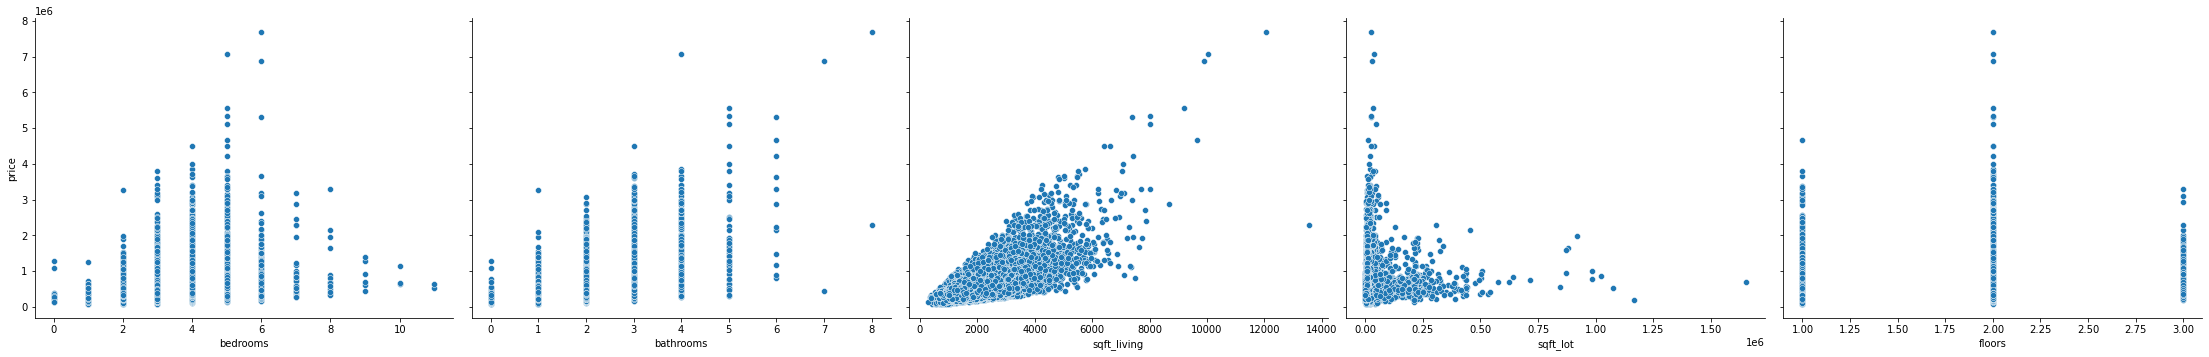

In [ ]:
plt.figure(figsize=(10,9))
sns.pairplot(data=df, x_vars=['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors'], y_vars=['price'], height=5, aspect=1.25, diag_kind=None)

Selanjutnya, untuk mengetahui nilai korelasi dari setiap features terhadap harga, dapat dilakukan dengan pembuatan tabel korelasi menggunakan perintah *corr()*.

In [ ]:
df.corr().style.background_gradient().set_precision(4)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
price,1.0000,0.3150,0.5101,0.7020,0.0897,0.2372
bedrooms,0.3150,1.0000,0.4792,0.5903,0.0327,0.1601
bathrooms,0.5101,0.4792,1.0000,0.6979,0.0853,0.4848
sqft_living,0.7020,0.5903,0.6979,1.0000,0.1728,0.3533
sqft_lot,0.0897,0.0327,0.0853,0.1728,1.0000,-0.0090
floors,0.2372,0.1601,0.4848,0.3533,-0.0090,1.0000


In [ ]:
#Pertama, buat variabel x dan y.
x = df.drop(columns='price') #semua column termasuk variabel x kecuali column price
y = df['price']

#Kedua, split data menjadi training and testing dengan perbandingan 9:1.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=4)

#Ketiga, buat variabel linear regresi.
lin_reg = LinearRegression()

#Keempat, train model menggunakan training data yang sudah split.
lin_reg.fit(x_train, y_train)

#Kelima, tampilkan nilai slope(m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

#Keenam, tentukan nilai akurasi dari model dengan data test
lin_reg.score(x_test, y_test)

[-6.89736576e+04  3.99937511e+04  3.07178506e+02 -3.69336558e-01
 -3.03949589e+04]
113343.42443798005


0.5147896907388336

Tahapan yang dilakukan untuk membuat model Machine Learning nya adalah :
- Pertama yang harus dilakukan adalah menentukan variabel dependent (y) dan variabel independent (x).
- Kedua, memilah-milah data menjadi data untuk training dan data untuk testing.
- Ketiga, buat variabel regresi linear
- Keempat, train model dengan menggunakan training data yang sudah dipilah.
- Kelima, tentukan nilai gradient/slope (m) dan intercept (b).
- Keenam, tentukan nilai akurasi dari model dengan menggunakan testing data.


Pada model diatas, didapat nilai akurasi sebesar 51,47%.

Untuk menerapkan model, maka dapat dilakukan dengan melakukan prediksi harga sesuai kriteria masukan.

Misalnya, dibutuhkan rumah dengan 3 kamar tidur, 4 kamar mandi, dengan luas rumah 3000sqft, luas tanah 5000sqft, dan memiliki 2 lantai, dapat menggunakan perintah berikut :

In [ ]:
lin_reg.predict([[3,4,3000,5000,2]])

array([925296.37469079])

Maka, didapat harga dari rumah tersebut diperkirakan sebesar USD 925.296,37